# **Aprentissage non supervisé**

l'apprentissage Non Supervisé consiste à utiliser des données non étiquetées et utiliser des algorithmes de clustering qui vont fouiller dans les données pour chercher à les segmenter en un ensemble de groupes homogènes en se basant sur des mesures de similarités. 
- Exemple d'algorithmes de clustering : KMeans


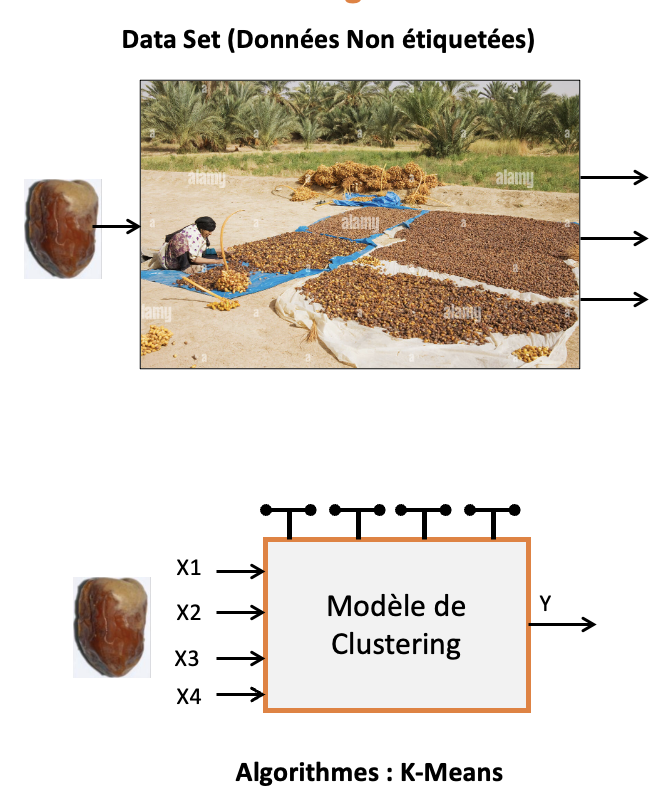

- L'algorithme des k-means (ou bien k-moyennes) est l’un des algorithmes d’apprentissage non supervisé qui permet d’analyser un jeu de données afin de regrouper les données « similaires » en groupes (ou clusters). 
- Ce principe est applicable dans divers domaines de l'industrie comme le domaine du marketing pour la segmentation des clients, analyse des réseaux sociaux,  segmentation des images médicales.
- **Principe de Fonctionnement :**



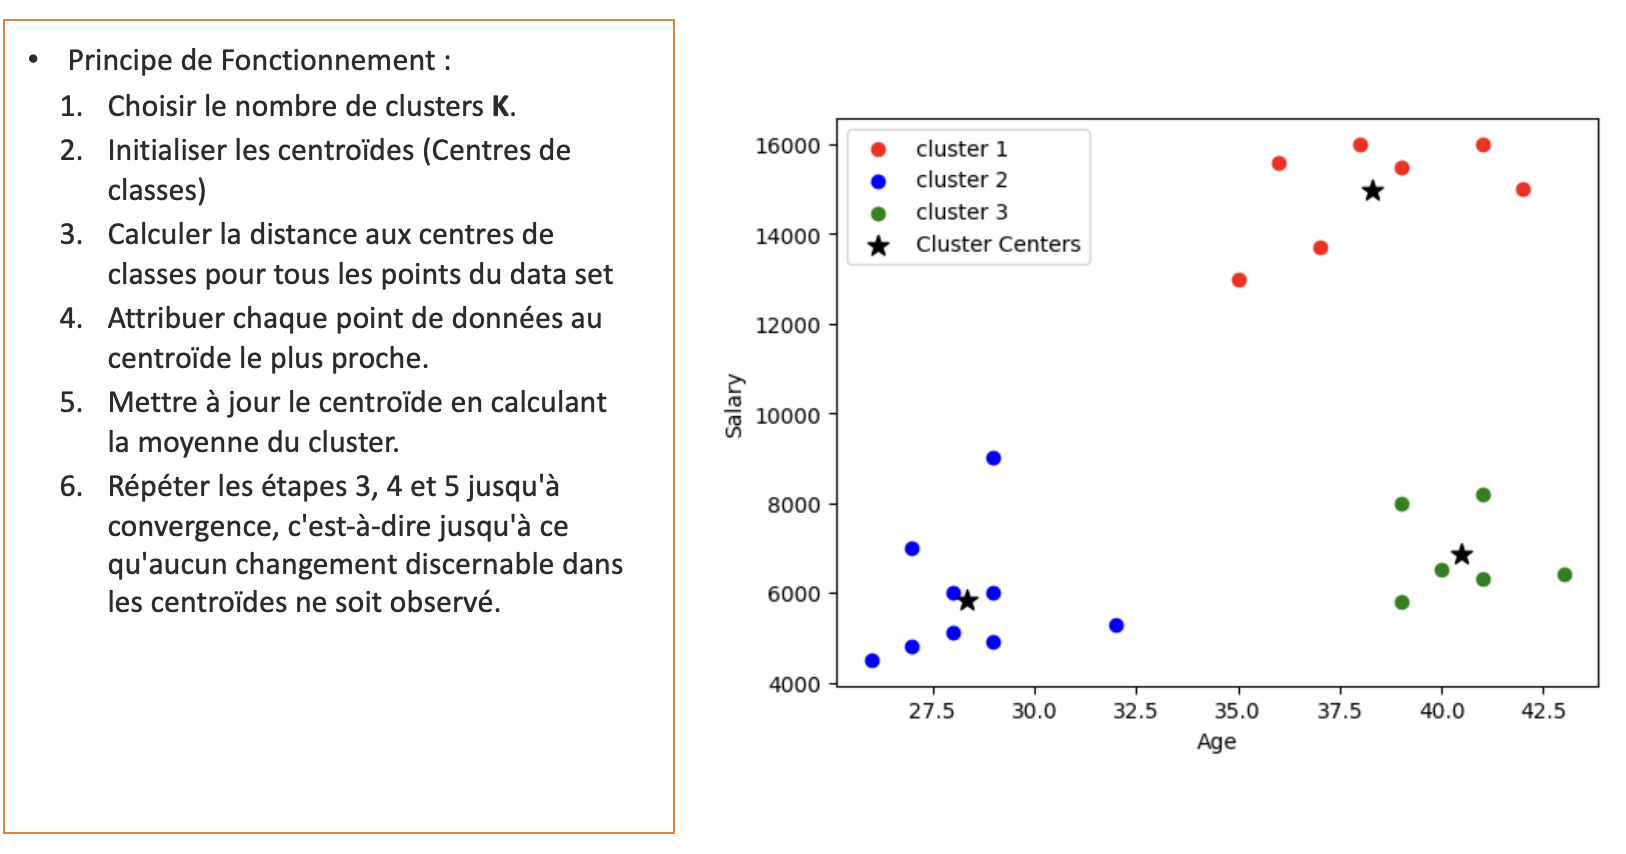

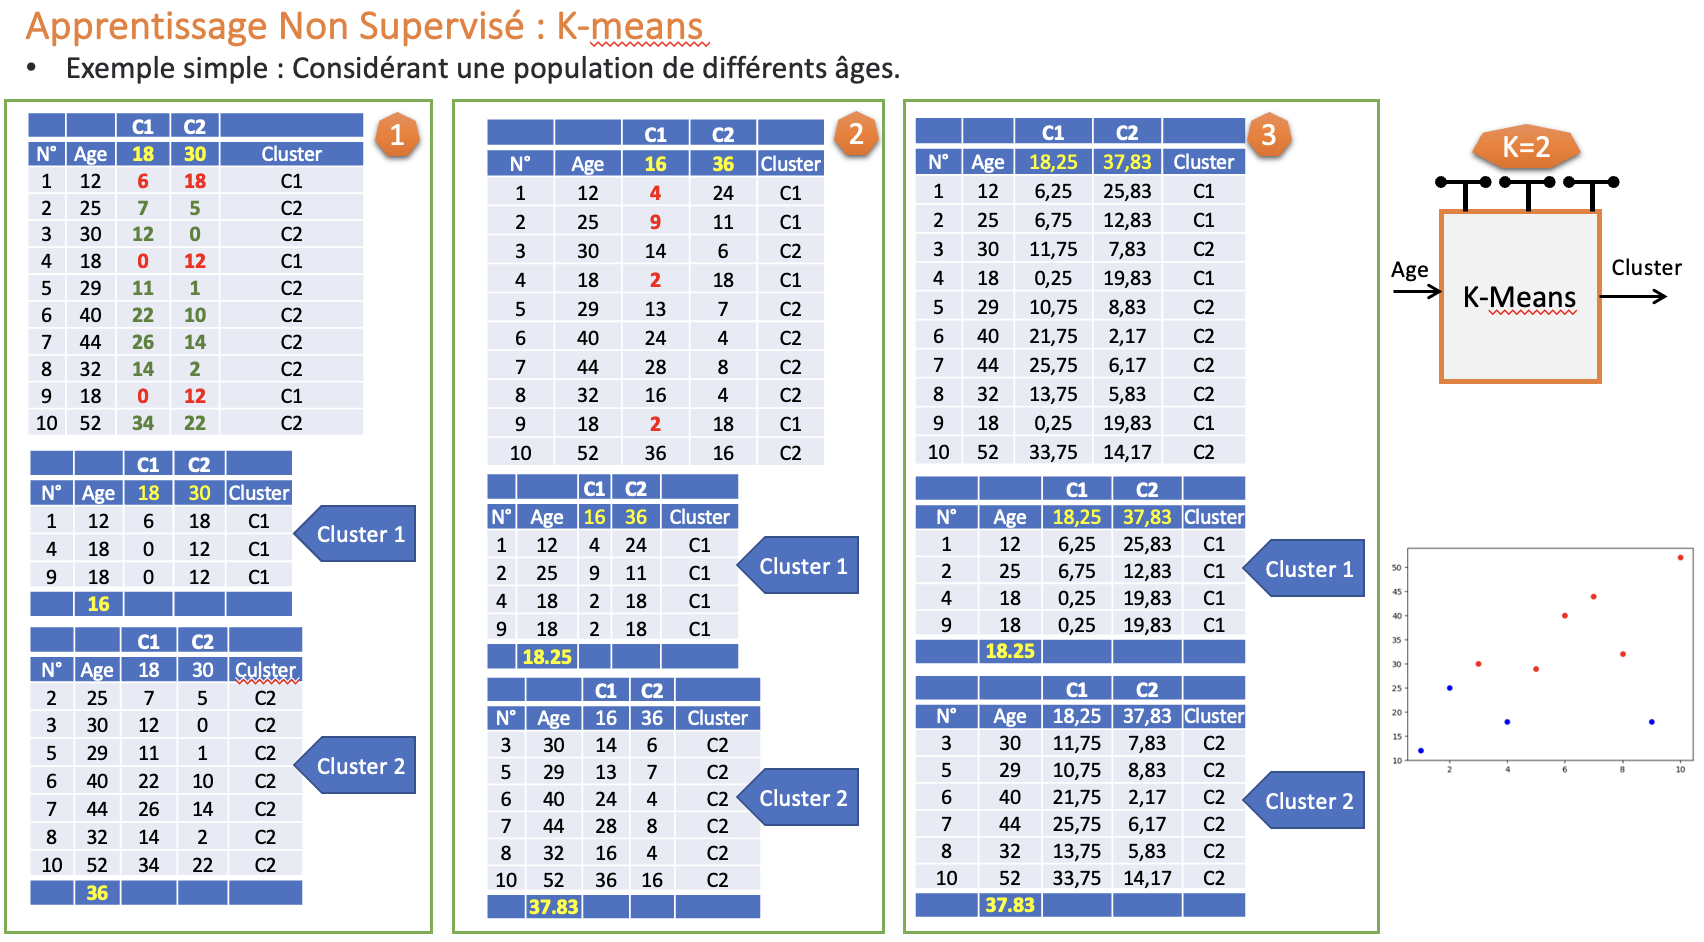

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt

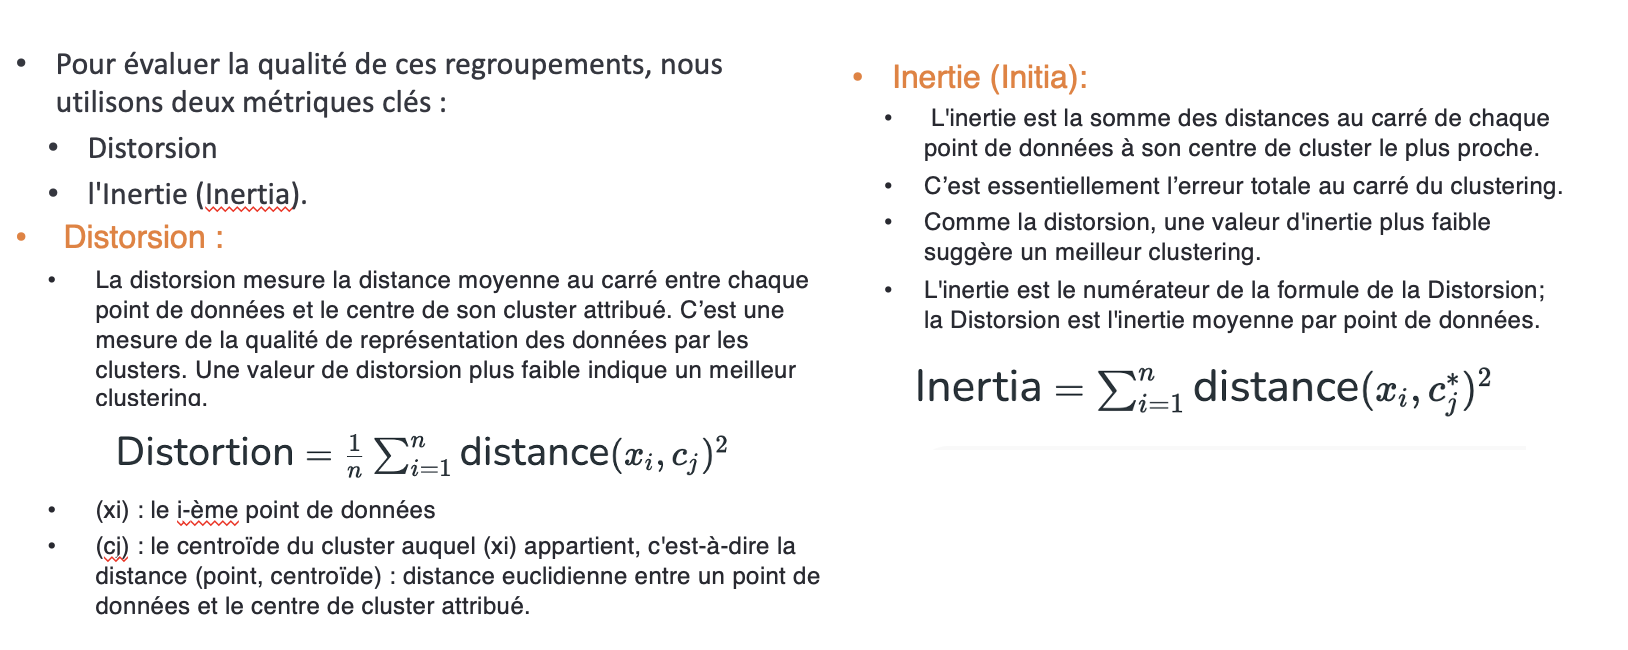

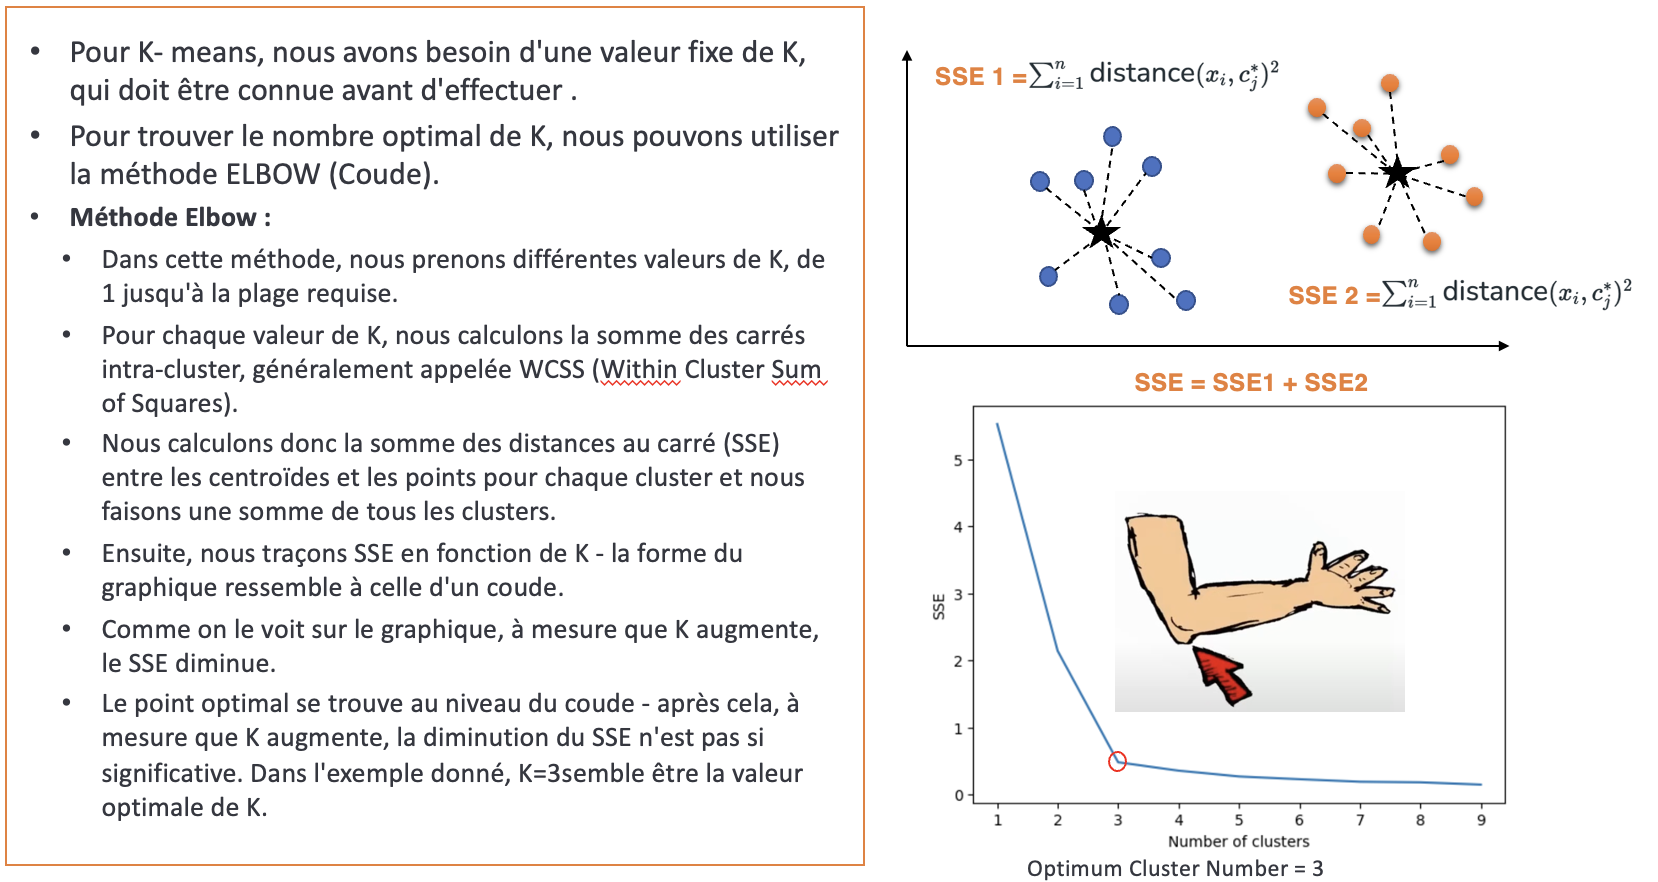

### Data Set

In [139]:
df = pd.read_csv('salaires.csv')

In [3]:
df

Name  Age  Salary
0       Ines   29    4900
1       Omar   32    5300
2    Sabrina   40    6500
3      Souad   41    6300
4      Nezha   43    6400
5      Rabia   39    8000
6   Soufiane   41    8200
7   Abdellah   39    5800
8    Mohamed   27    7000
9    Yassine   29    9000
10     Azizi   38   16000
11     Ahmed   36   15600
12   Yasmine   35   13000
13       Aya   37   13700
14   Zakaria   26    4500
15    Fatima   27    4800
16     Salim   28    5100
17     Imane   29    6000
18    Ismail   28    6000
19     Malak   42   15000
20    Hanane   39   15500
21   Ibrahim   41   16000

Text(0, 0.5, 'Salary')

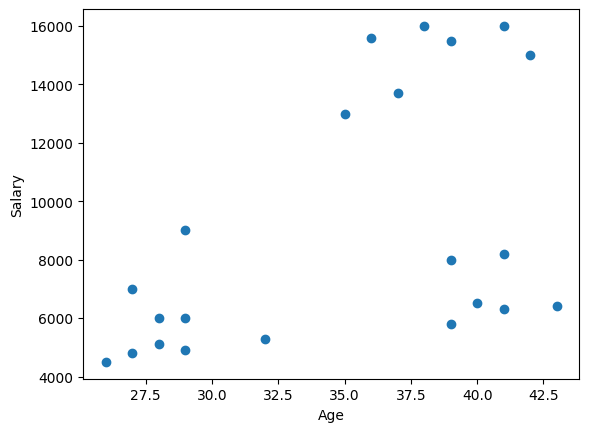

In [39]:
plt.scatter(df['Age'], df['Salary'])
plt.xlabel("Age")
plt.ylabel("Salary")

### **Clustering avec K-Means**

In [5]:
km = KMeans(n_clusters=3, random_state=0)

In [6]:
X = df.drop(columns=['Name'])

In [7]:
km.fit(X)

KMeans(n_clusters=3, random_state=0)

In [8]:
km.labels_

array([1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0],
      dtype=int32)

In [9]:
predicted = km.predict(X)

In [10]:
predicted

array([1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0],
      dtype=int32)

In [11]:
km.labels_==predicted

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [12]:
df['cluster']= predicted

In [13]:
df

Name  Age  Salary  cluster
0       Ines   29    4900        1
1       Omar   32    5300        1
2    Sabrina   40    6500        1
3      Souad   41    6300        1
4      Nezha   43    6400        1
5      Rabia   39    8000        2
6   Soufiane   41    8200        2
7   Abdellah   39    5800        1
8    Mohamed   27    7000        2
9    Yassine   29    9000        2
10     Azizi   38   16000        0
11     Ahmed   36   15600        0
12   Yasmine   35   13000        0
13       Aya   37   13700        0
14   Zakaria   26    4500        1
15    Fatima   27    4800        1
16     Salim   28    5100        1
17     Imane   29    6000        1
18    Ismail   28    6000        1
19     Malak   42   15000        0
20    Hanane   39   15500        0
21   Ibrahim   41   16000        0

In [14]:
cluster1 = df[df['cluster']==0]
cluster2 = df[df['cluster']==1]
cluster3 = df[df['cluster']==2]

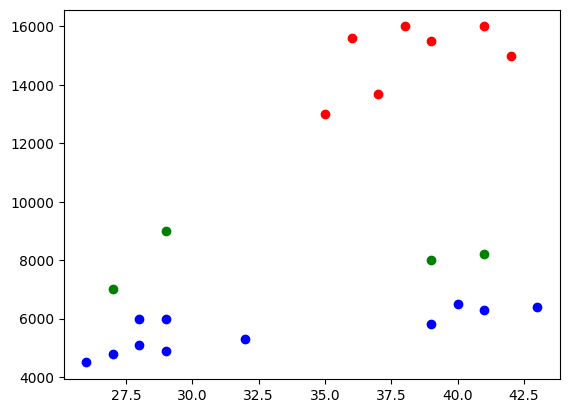

In [15]:
plt.scatter(cluster1['Age'], cluster1['Salary'], color='red')
plt.scatter(cluster2['Age'], cluster2['Salary'], color='blue')
plt.scatter(cluster3['Age'], cluster3['Salary'], color='green')

### **Normalisation et standardisation des données**

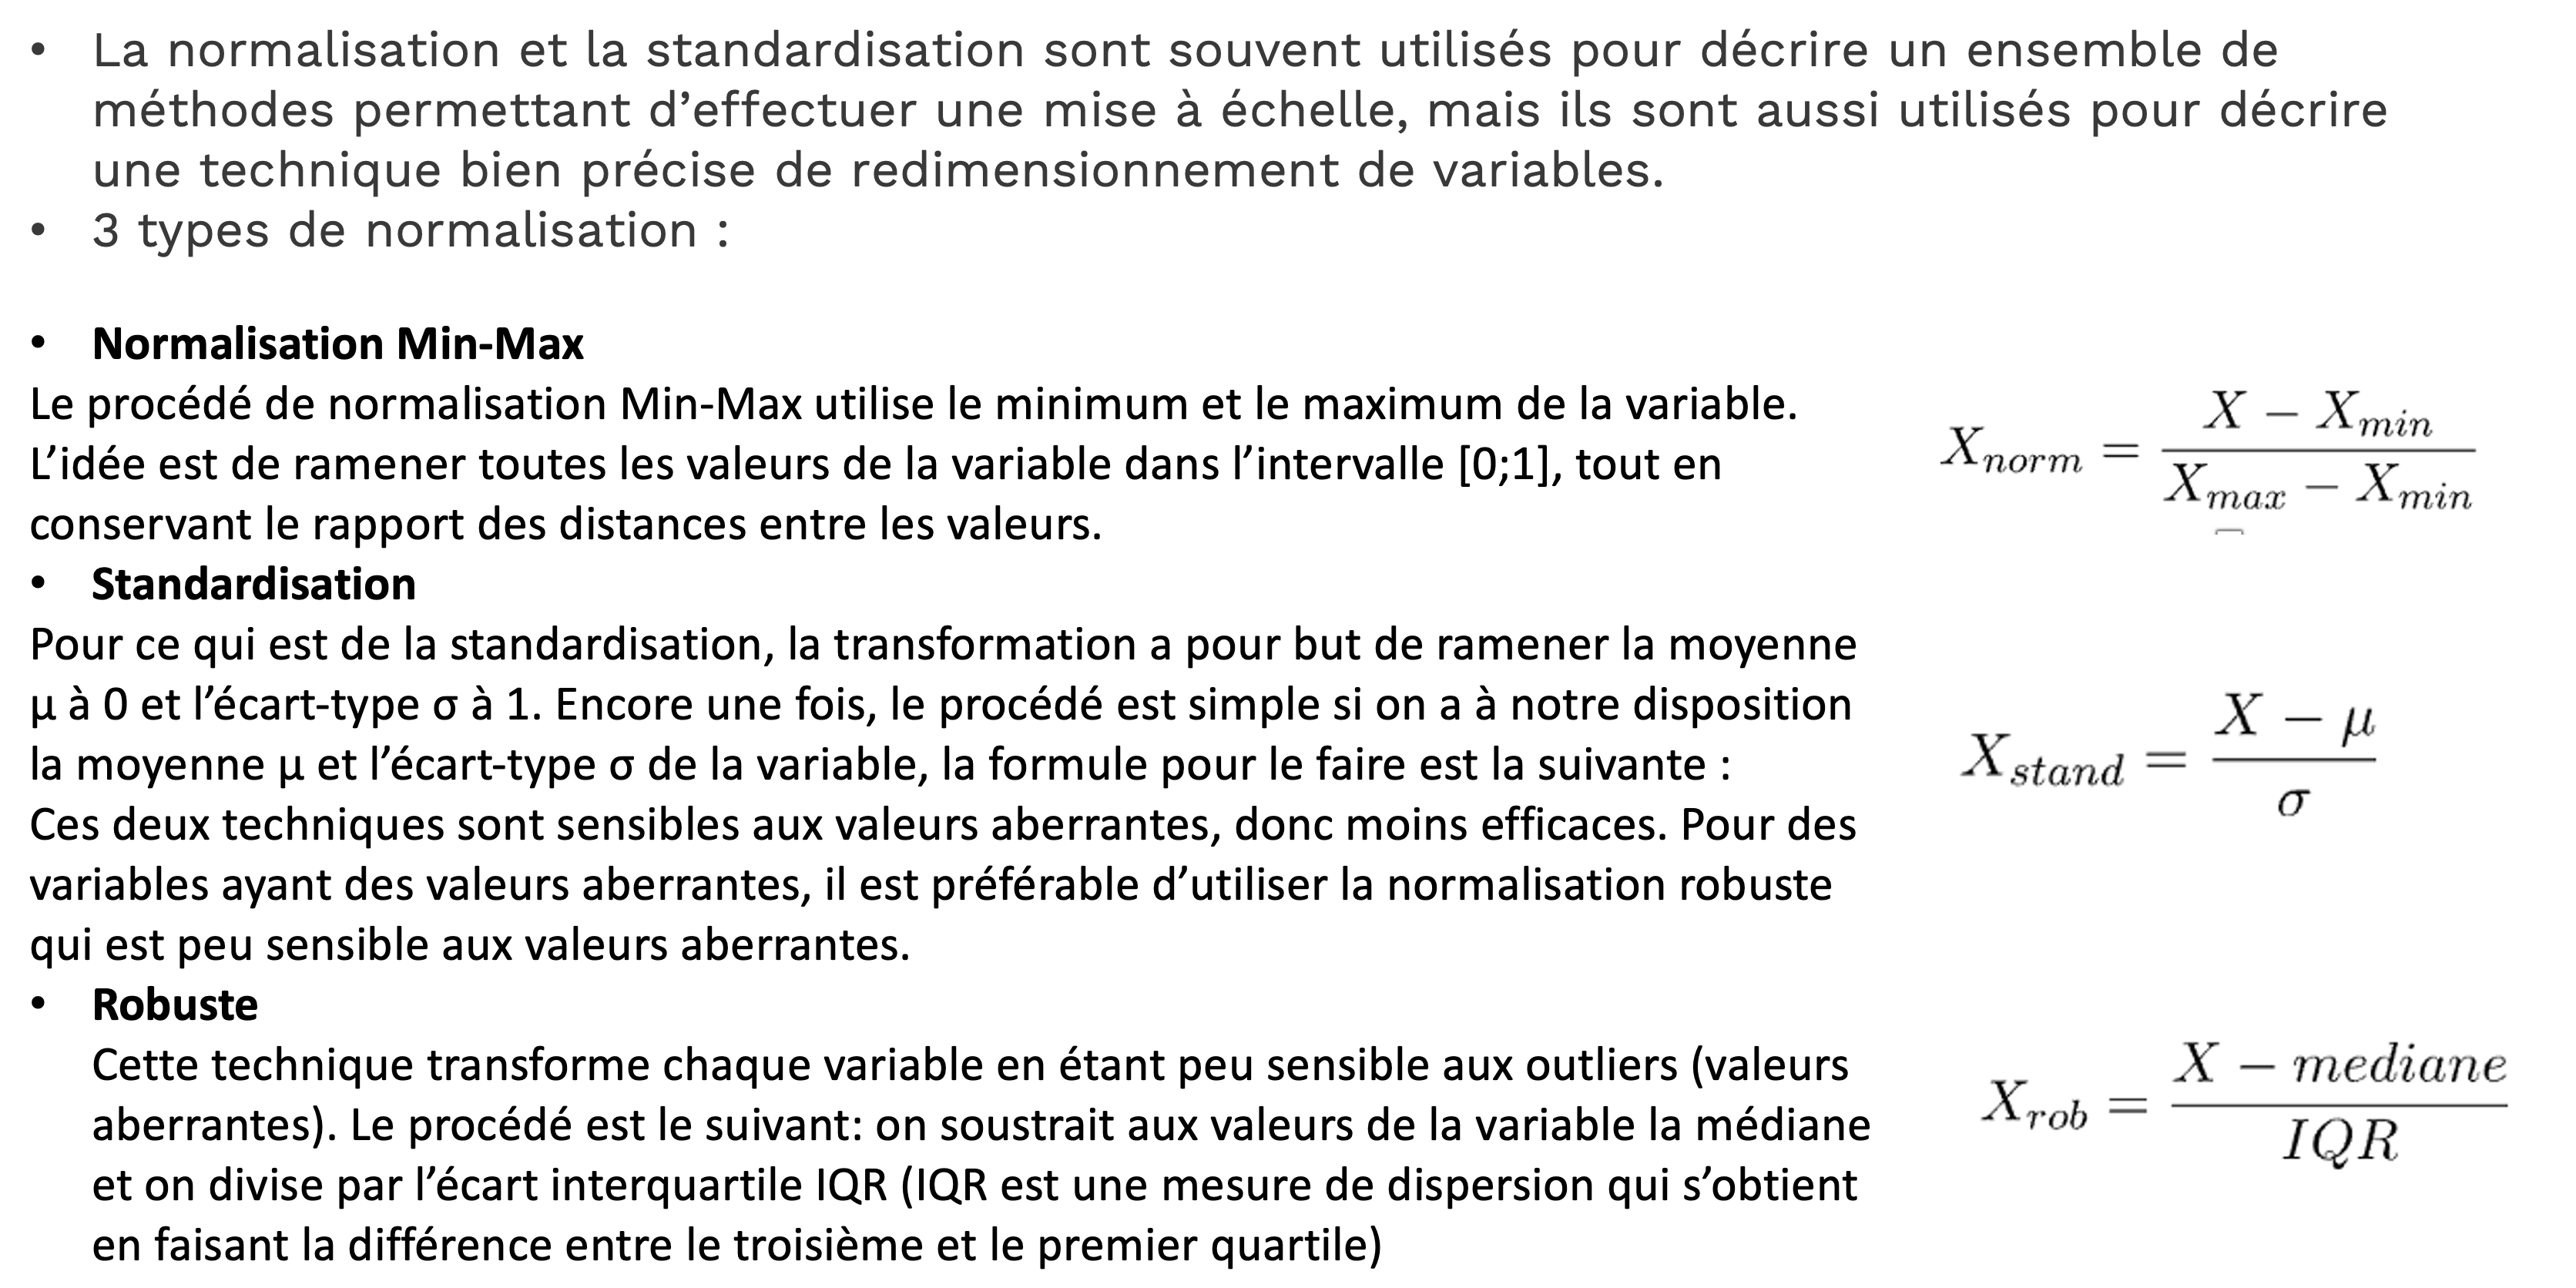

In [137]:
import seaborn as sns

In [141]:
df.describe().T

count         mean          std     min     25%     50%       75%  \
Age      22.0    34.818182     5.901060    26.0    29.0    36.5     39.75   
Salary   22.0  9027.272727  4340.636536  4500.0  5850.0  6750.0  13525.00   

            max  
Age        43.0  
Salary  16000.0

<Axes: xlabel='Age'>

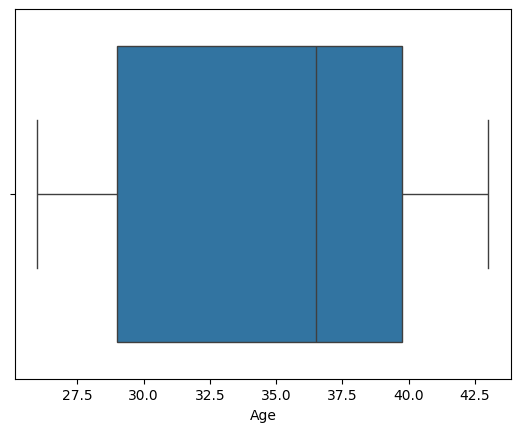

In [143]:
sns.boxplot(x=df['Age'])

In [16]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

In [17]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
X_scaled

array([[0.17647059, 0.03478261],
       [0.35294118, 0.06956522],
       [0.82352941, 0.17391304],
       [0.88235294, 0.15652174],
       [1.        , 0.16521739],
       [0.76470588, 0.30434783],
       [0.88235294, 0.32173913],
       [0.76470588, 0.11304348],
       [0.05882353, 0.2173913 ],
       [0.17647059, 0.39130435],
       [0.70588235, 1.        ],
       [0.58823529, 0.96521739],
       [0.52941176, 0.73913043],
       [0.64705882, 0.8       ],
       [0.        , 0.        ],
       [0.05882353, 0.02608696],
       [0.11764706, 0.05217391],
       [0.17647059, 0.13043478],
       [0.11764706, 0.13043478],
       [0.94117647, 0.91304348],
       [0.76470588, 0.95652174],
       [0.88235294, 1.        ]])

In [52]:
scaler.inverse_transform([[0.88235294, 1.       ]])

array([[   40.99999998, 16000.        ]])

### **Pipe Line de Modèles**

In [136]:
estimator = Pipeline([
    ("MinMaxScaler", MinMaxScaler()),
    ("clustering", KMeans(n_clusters=3, random_state=0))
]
)

In [20]:
estimator.fit(X)

Pipeline(steps=[('MinMaxScaler', MinMaxScaler()),
                ('clustering', KMeans(n_clusters=3, random_state=0))])

In [22]:
predicted2 = estimator.predict(X)

In [ ]:
df['cluster2'] = predicted2

In [24]:
cluster1 = df[df['cluster2']==0]
cluster2 = df[df['cluster2']==1]
cluster3 = df[df['cluster2']==2]

In [55]:
centers_scaled = estimator[-1].cluster_centers_
centers = estimator[0].inverse_transform(centers_scaled)

In [56]:
centers_scaled

array([[0.72268908, 0.91055901],
       [0.1372549 , 0.11690821],
       [0.85294118, 0.2057971 ]])

In [57]:
centers

array([[   38.28571429, 14971.42857143],
       [   28.33333333,  5844.44444444],
       [   40.5       ,  6866.66666667]])

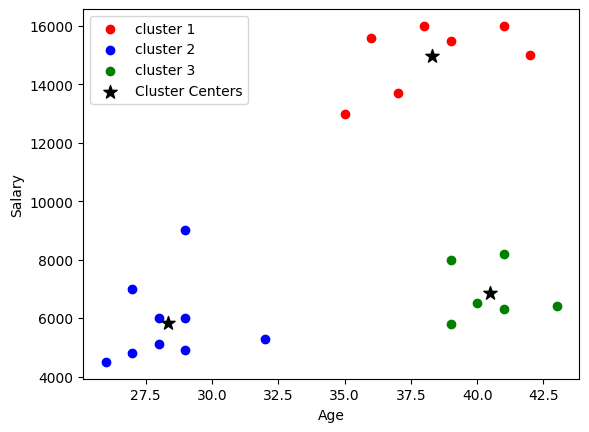

In [70]:
plt.scatter(cluster1['Age'], cluster1['Salary'], color='red', label = "cluster 1")
plt.scatter(cluster2['Age'], cluster2['Salary'], color='blue', label = "cluster 2")
plt.scatter(cluster3['Age'], cluster3['Salary'], color='green', label = "cluster 3")
plt.scatter(centers[:,0], centers[:,1], color="black", marker='*', s=100, label="Cluster Centers")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.legend()

### **Elbow et Silohouette pour trouver le nombre optimum de clusters**

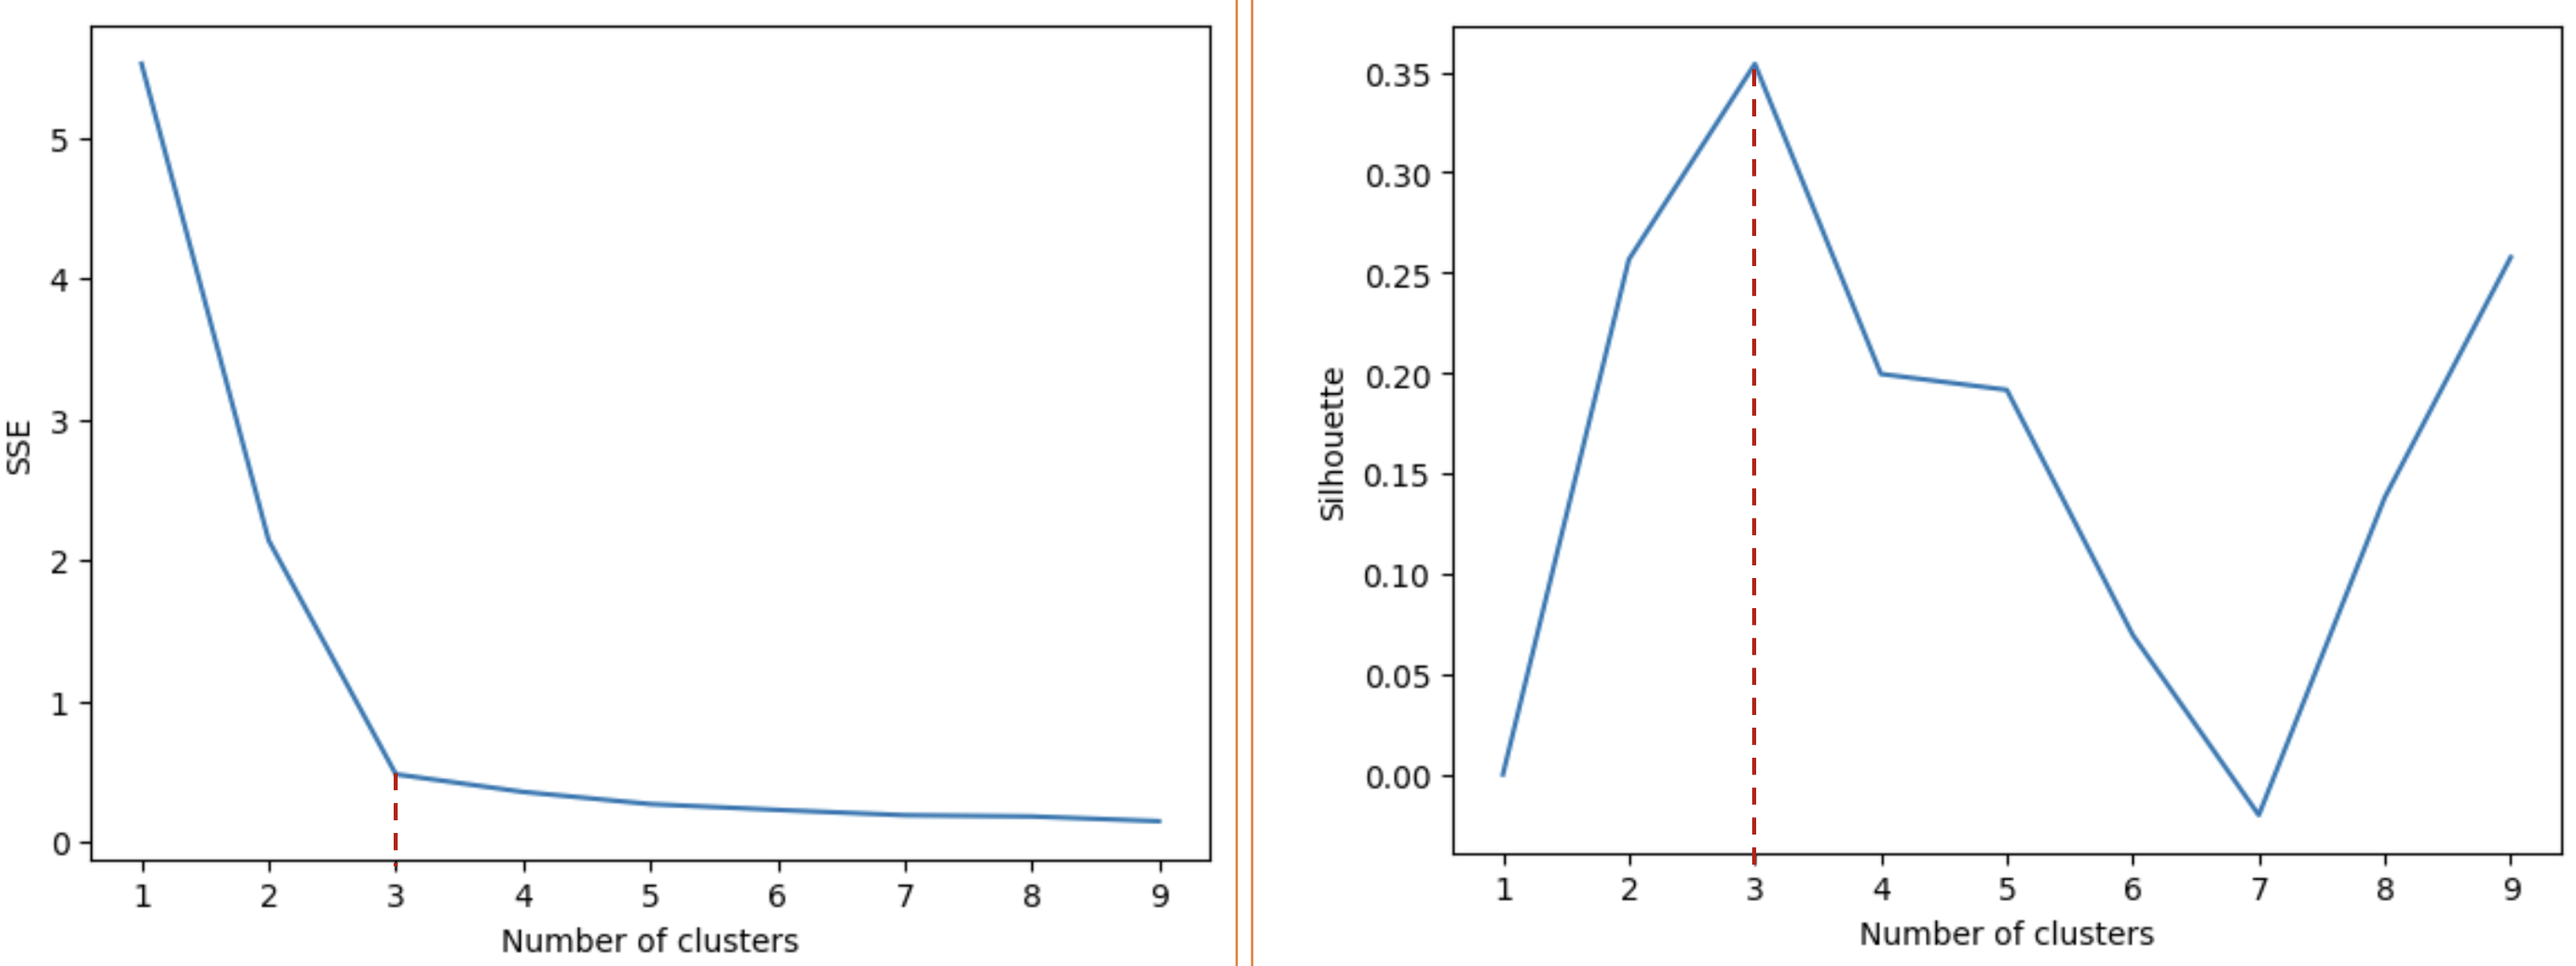

In [36]:
from sklearn.metrics import silhouette_score
sse=[]
sil=[]
krange = range(1,10)
for k in krange:
    km = Pipeline([
        ("MinMaxScaler", MinMaxScaler()),
        ("clustering", KMeans(n_clusters=k, random_state=0))
        ]
        )
    km.fit(X)
    sse.append(km[-1].inertia_)
    if(k==1):
        sil.append(0)
    else :    
        sil.append(silhouette_score(X, km[-1].labels_))
    

In [72]:
sse

[5.522140987850921,
 2.139183706762151,
 0.4796830920366221,
 0.3546287126734011,
 0.26819371493732613,
 0.22690756427112166,
 0.18904083568265526,
 0.18057431161055554,
 0.14689918738539565]

In [73]:
sil

[0,
 np.float64(0.25657476200964113),
 np.float64(0.35398455359639963),
 np.float64(0.1995366438963641),
 np.float64(0.19160118123962888),
 np.float64(0.0694716270838743),
 np.float64(-0.020201042966170576),
 np.float64(0.1380407992851944),
 np.float64(0.2576952732350539)]

Text(0, 0.5, 'SSE')

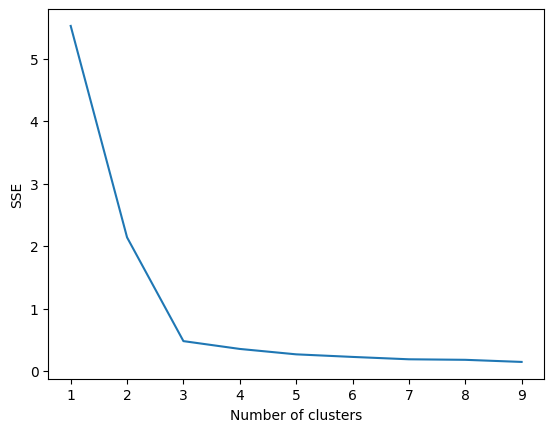

In [37]:
plt.plot(krange, sse,)
plt.xlabel("Number of clusters")
plt.ylabel("SSE")

Text(0, 0.5, 'Silhouette')

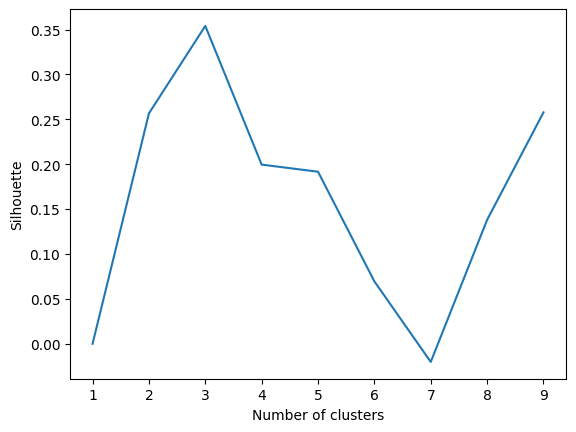

In [71]:
plt.plot(krange, sil,)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette")

### **Principal Component Analysis (PCA)** 

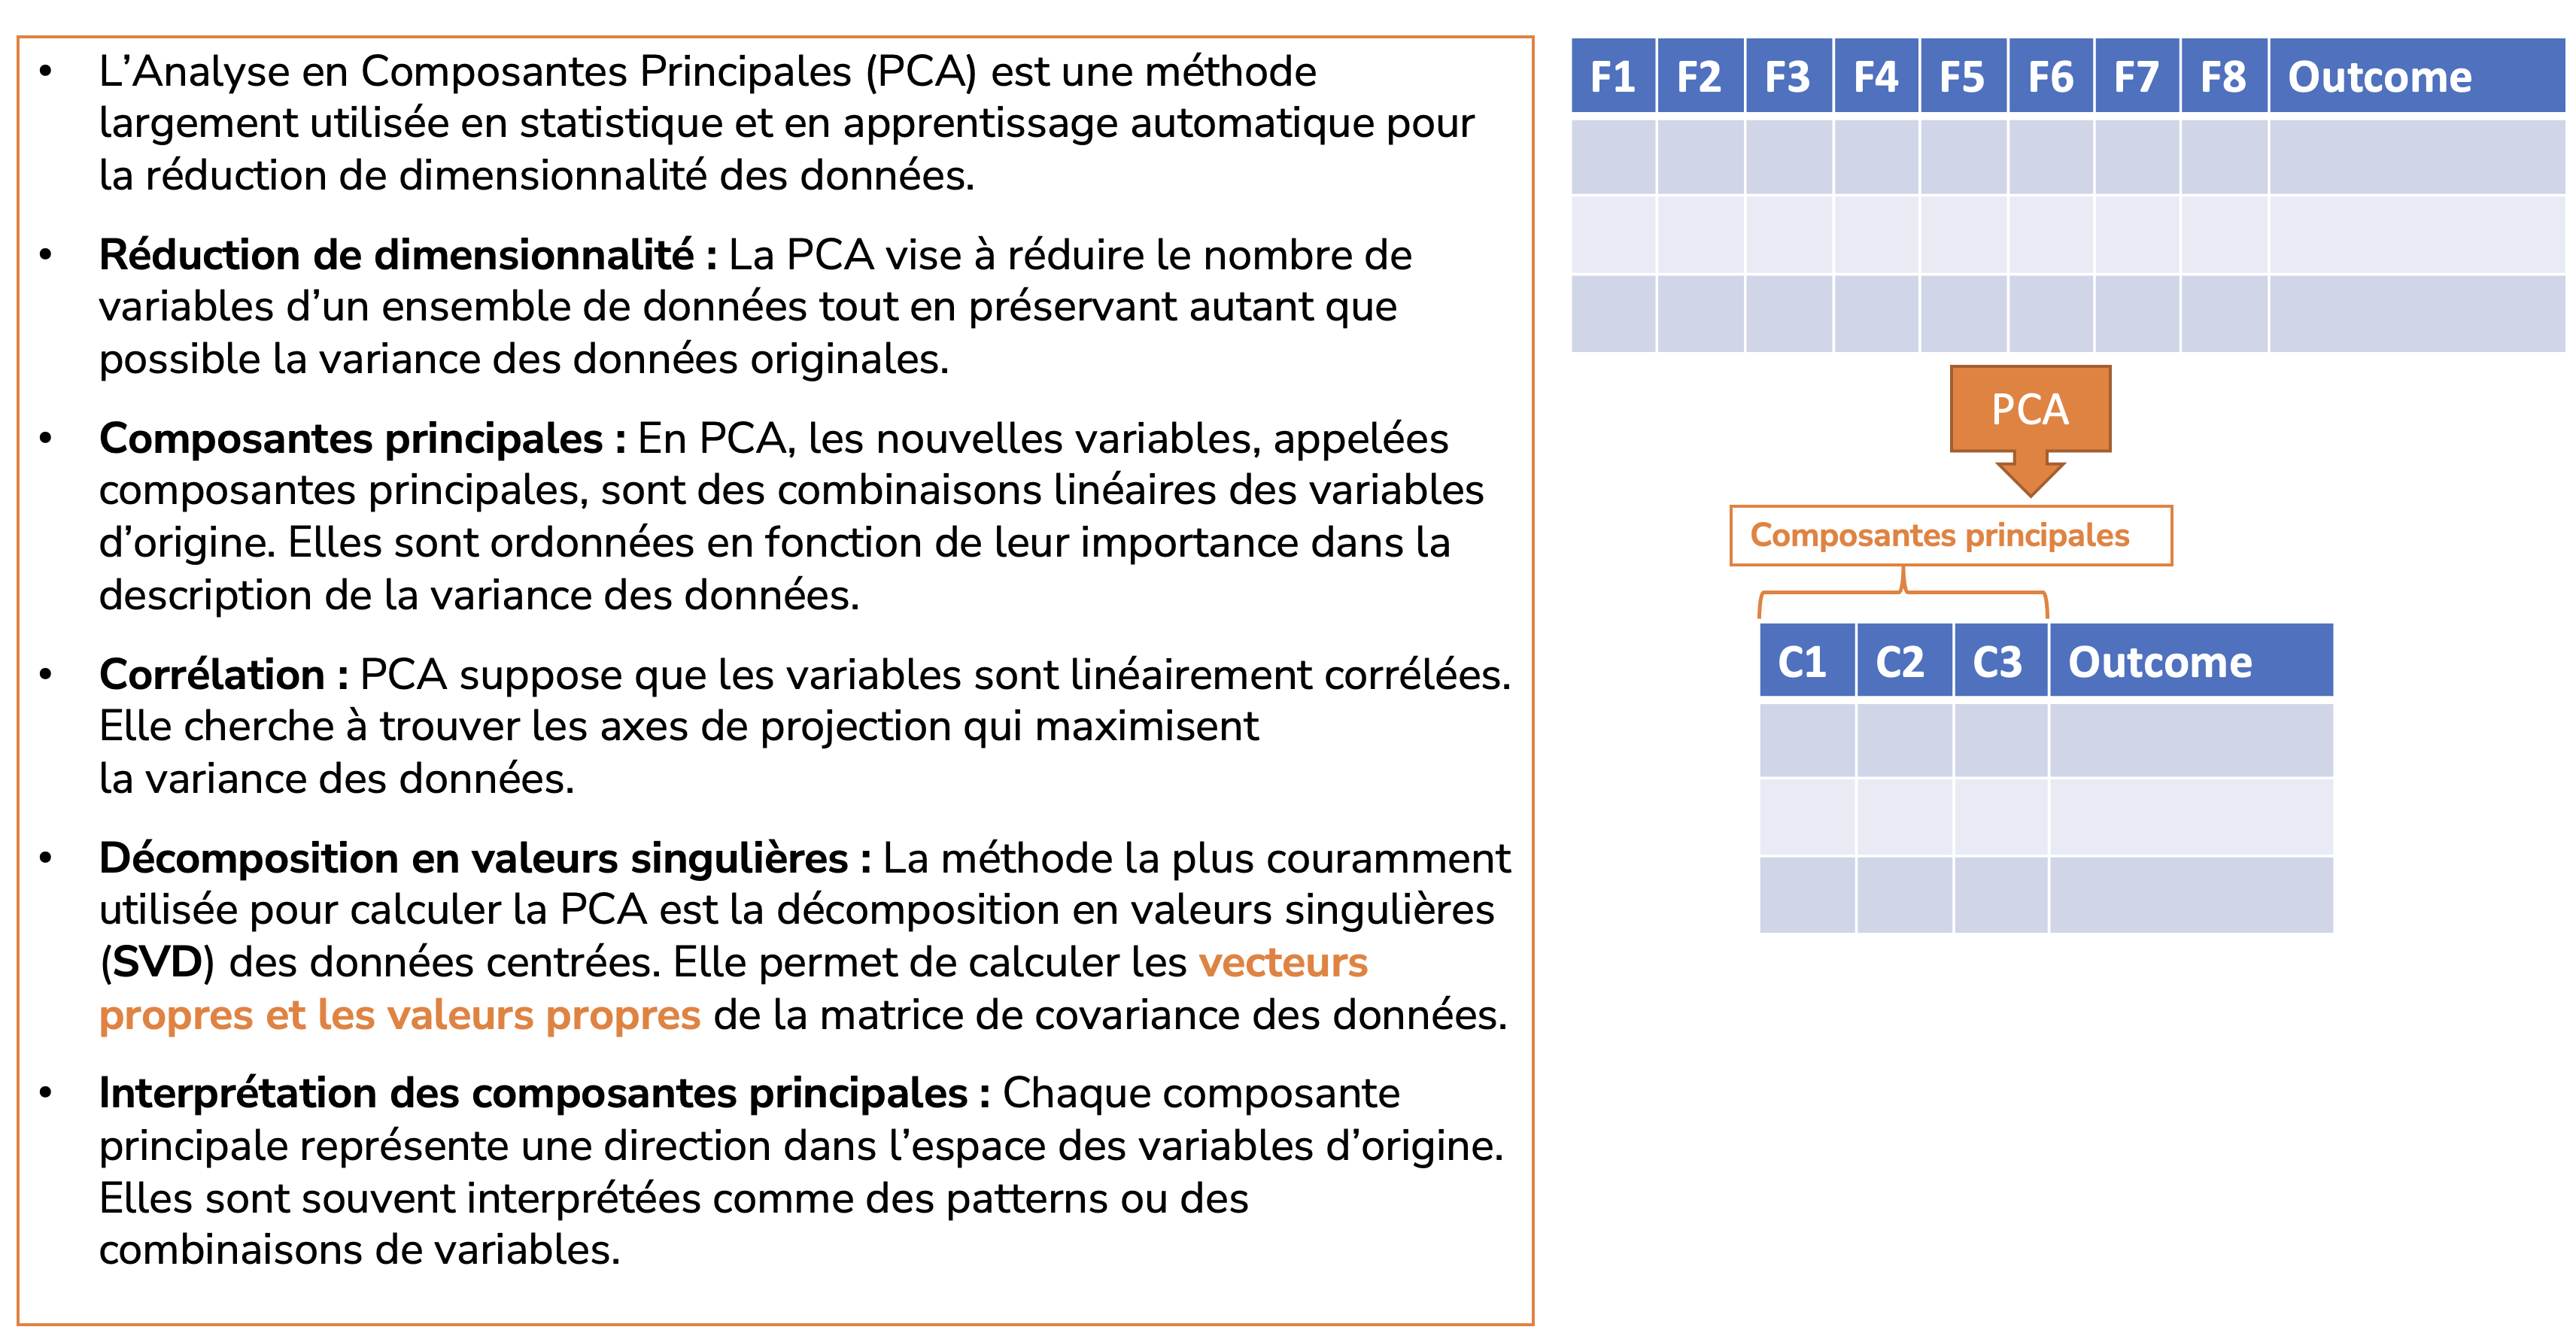

In [74]:
from sklearn.datasets import load_digits
import pandas as pd

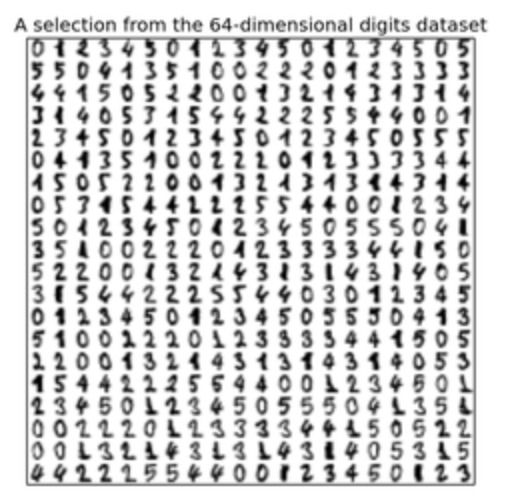

In [75]:
dataset = load_digits()

In [76]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [83]:
data = dataset.data

In [85]:
data.shape

(1797, 64)

In [86]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [87]:
data[0].reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [94]:
from matplotlib import pyplot as plt

<Figure size 640x480 with 0 Axes>

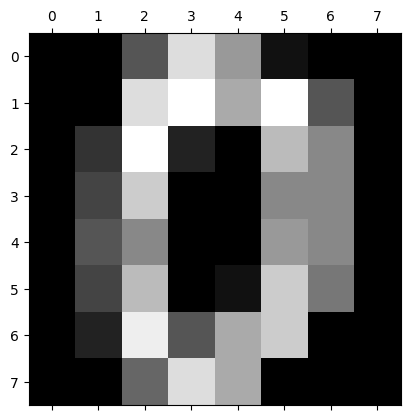

In [95]:
plt.gray()
plt.matshow(dataset.data[0].reshape(8,8))

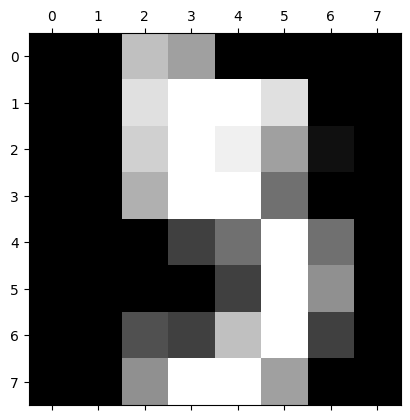

In [99]:
plt.matshow(dataset.data[5].reshape(8,8))

In [103]:
dataset.target[:20]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [104]:
df = pd.DataFrame(data=data, columns=dataset['feature_names'])

In [105]:
df

pixel_0_0  pixel_0_1  pixel_0_2  pixel_0_3  pixel_0_4  pixel_0_5  \
0           0.0        0.0        5.0       13.0        9.0        1.0   
1           0.0        0.0        0.0       12.0       13.0        5.0   
2           0.0        0.0        0.0        4.0       15.0       12.0   
3           0.0        0.0        7.0       15.0       13.0        1.0   
4           0.0        0.0        0.0        1.0       11.0        0.0   
...         ...        ...        ...        ...        ...        ...   
1792        0.0        0.0        4.0       10.0       13.0        6.0   
1793        0.0        0.0        6.0       16.0       13.0       11.0   
1794        0.0        0.0        1.0       11.0       15.0        1.0   
1795        0.0        0.0        2.0       10.0        7.0        0.0   
1796        0.0        0.0       10.0       14.0        8.0        1.0   

      pixel_0_6  pixel_0_7  pixel_1_0  pixel_1_1  ...  pixel_6_6  pixel_6_7  \
0           0.0        0.0        0.0        0.0  ...        0.0        0.0   
1           0.0        0.0        0.0        0.0  ...        0.0        0.0   
2           0.0        0.0        0.0        0.0  ...        5.0        0.0   
3           0.0        0.0        0.0        8.0  ...        9.0        0.0   
4           0.0        0.0        0.0        0.0  ...        0.0        0.0   
...         ...        ...        ...        ...  ...        ...        ...   
1792        0.0        0.0        0.0        1.0  ...        4.0        0.0   
1793        1.0        0.0        0.0        0.0  ...        1.0        0.0   
1794        0.0        0.0        0.0        0.0  ...        0.0        0.0   
1795        0.0        0.0        0.0        0.0  ...        2.0        0.0   
1796        0.0        0.0        0.0        2.0  ...        8.0        0.0   

      pixel_7_0  pixel_7_1  pixel_7_2  pixel_7_3  pixel_7_4  pixel_7_5  \
0           0.0        0.0        6.0       13.0       10.0        0.0   
1           0.0        0.0        0.0       11.0       16.0       10.0   
2           0.0        0.0        0.0        3.0       11.0       16.0   
3           0.0        0.0        7.0       13.0       13.0        9.0   
4           0.0        0.0        0.0        2.0       16.0        4.0   
...         ...        ...        ...        ...        ...        ...   
1792        0.0        0.0        2.0       14.0       15.0        9.0   
1793        0.0        0.0        6.0       16.0       14.0        6.0   
1794        0.0        0.0        2.0        9.0       13.0        6.0   
1795        0.0        0.0        5.0       12.0       16.0       12.0   
1796        0.0        1.0        8.0       12.0       14.0       12.0   

      pixel_7_6  pixel_7_7  
0           0.0        0.0  
1           0.0        0.0  
2           9.0        0.0  
3           0.0        0.0  
4           0.0        0.0  
...         ...        ...  
1792        0.0        0.0  
1793        0.0        0.0  
1794        0.0        0.0  
1795        0.0        0.0  
1796        1.0        0.0  

[1797 rows x 64 columns]

In [106]:
df.describe()

pixel_0_0    pixel_0_1    pixel_0_2    pixel_0_3    pixel_0_4  \
count     1797.0  1797.000000  1797.000000  1797.000000  1797.000000   
mean         0.0     0.303840     5.204786    11.835838    11.848080   
std          0.0     0.907192     4.754826     4.248842     4.287388   
min          0.0     0.000000     0.000000     0.000000     0.000000   
25%          0.0     0.000000     1.000000    10.000000    10.000000   
50%          0.0     0.000000     4.000000    13.000000    13.000000   
75%          0.0     0.000000     9.000000    15.000000    15.000000   
max          0.0     8.000000    16.000000    16.000000    16.000000   

         pixel_0_5    pixel_0_6    pixel_0_7    pixel_1_0    pixel_1_1  ...  \
count  1797.000000  1797.000000  1797.000000  1797.000000  1797.000000  ...   
mean      5.781859     1.362270     0.129661     0.005565     1.993879  ...   
std       5.666418     3.325775     1.037383     0.094222     3.196160  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
50%       4.000000     0.000000     0.000000     0.000000     0.000000  ...   
75%      11.000000     0.000000     0.000000     0.000000     3.000000  ...   
max      16.000000    16.000000    15.000000     2.000000    16.000000  ...   

         pixel_6_6    pixel_6_7    pixel_7_0    pixel_7_1    pixel_7_2  \
count  1797.000000  1797.000000  1797.000000  1797.000000  1797.000000   
mean      3.725097     0.206455     0.000556     0.279354     5.557596   
std       4.919406     0.984401     0.023590     0.934302     5.103019   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     1.000000   
50%       1.000000     0.000000     0.000000     0.000000     4.000000   
75%       7.000000     0.000000     0.000000     0.000000    10.000000   
max      16.000000    13.000000     1.000000     9.000000    16.000000   

         pixel_7_3    pixel_7_4    pixel_7_5    pixel_7_6    pixel_7_7  
count  1797.000000  1797.000000  1797.000000  1797.000000  1797.000000  
mean     12.089037    11.809126     6.764051     2.067891     0.364496  
std       4.374694     4.933947     5.900623     4.090548     1.860122  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%      11.000000    10.000000     0.000000     0.000000     0.000000  
50%      13.000000    14.000000     6.000000     0.000000     0.000000  
75%      16.000000    16.000000    12.000000     2.000000     0.000000  
max      16.000000    16.000000    16.000000    16.000000    16.000000  

[8 rows x 64 columns]

### **Logistic Regression**

In [107]:
X = df
y = dataset.target

In [150]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix

In [109]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]], shape=(1797, 64))

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=30)

In [145]:
model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9722222222222222

In [146]:
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

In [148]:
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       143
           1       0.99      1.00      1.00       136
           2       1.00      1.00      1.00       136
           3       1.00      1.00      1.00       157
           4       1.00      1.00      1.00       146
           5       1.00      1.00      1.00       144
           6       1.00      1.00      1.00       139
           7       1.00      1.00      1.00       147
           8       1.00      0.99      1.00       139
           9       1.00      1.00      1.00       150

    accuracy                           1.00      1437
   macro avg       1.00      1.00      1.00      1437
weighted avg       1.00      1.00      1.00      1437



In [149]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      0.93      0.97        46
           2       0.98      1.00      0.99        41
           3       0.93      0.96      0.94        26
           4       1.00      0.94      0.97        35
           5       1.00      0.95      0.97        38
           6       1.00      1.00      1.00        42
           7       1.00      1.00      1.00        32
           8       0.94      0.97      0.96        35
           9       0.85      0.97      0.91        30

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



[[143   0   0   0   0   0   0   0   0   0]
 [  0 136   0   0   0   0   0   0   0   0]
 [  0   0 136   0   0   0   0   0   0   0]
 [  0   0   0 157   0   0   0   0   0   0]
 [  0   0   0   0 146   0   0   0   0   0]
 [  0   0   0   0   0 144   0   0   0   0]
 [  0   0   0   0   0   0 139   0   0   0]
 [  0   0   0   0   0   0   0 147   0   0]
 [  0   1   0   0   0   0   0   0 138   0]
 [  0   0   0   0   0   0   0   0   0 150]]


<Axes: >

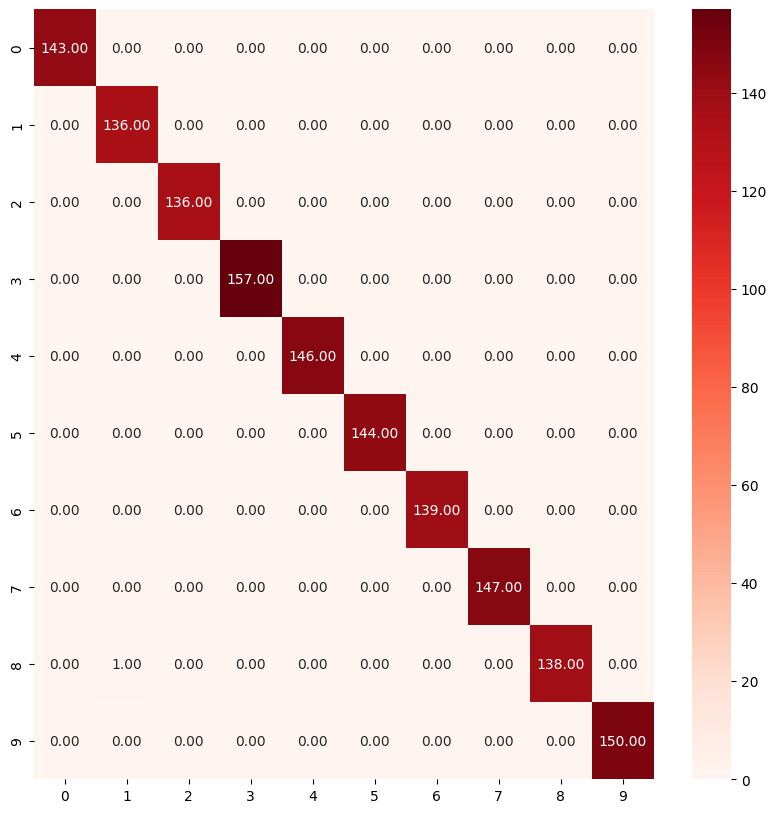

In [155]:
cm_train = confusion_matrix(y_train, pred_train)
print(cm_train)
plt.figure(figsize=(10,10))
sns.heatmap(cm_train, annot=True, fmt='.2f', cmap='Reds')

[[35  0  0  0  0  0  0  0  0  0]
 [ 0 43  0  0  0  0  0  0  2  1]
 [ 0  0 41  0  0  0  0  0  0  0]
 [ 0  0  1 25  0  0  0  0  0  0]
 [ 0  0  0  0 33  0  0  0  0  2]
 [ 0  0  0  0  0 36  0  0  0  2]
 [ 0  0  0  0  0  0 42  0  0  0]
 [ 0  0  0  0  0  0  0 32  0  0]
 [ 0  0  0  1  0  0  0  0 34  0]
 [ 0  0  0  1  0  0  0  0  0 29]]


<Axes: >

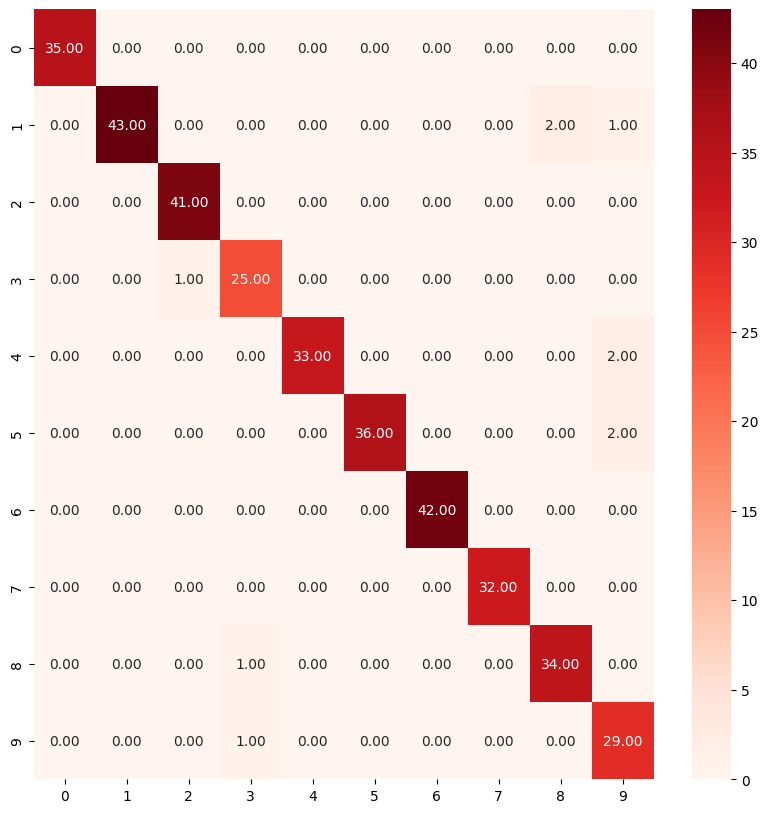

In [156]:
cm_test = confusion_matrix(y_test, pred_test)
print(cm_test)
plt.figure(figsize=(10,10))
sns.heatmap(cm_test, annot=True, fmt='.2f', cmap='Reds')

### **PCA (95%)**

In [115]:
pca = PCA(0.95)
X_pca = pca.fit_transform(X)
X_pca.shape

(1797, 29)

In [117]:
evr=pca.explained_variance_ratio_

In [118]:
evr

array([0.14890594, 0.13618771, 0.11794594, 0.08409979, 0.05782415,
       0.0491691 , 0.04315987, 0.03661373, 0.03353248, 0.03078806,
       0.02372341, 0.02272697, 0.01821863, 0.01773855, 0.01467101,
       0.01409716, 0.01318589, 0.01248138, 0.01017718, 0.00905617,
       0.00889538, 0.00797123, 0.00767493, 0.00722904, 0.00695889,
       0.00596081, 0.00575615, 0.00515158, 0.0048954 ])

In [119]:
evr.sum()

np.float64(0.9547965245651596)

In [120]:
pca.n_components_

np.int64(29)

In [124]:
X_pca

array([[ -1.25946645, -21.27488348,   9.46305462, ...,   3.67072108,
          0.9436689 ,   1.13250195],
       [  7.9576113 ,  20.76869896,  -4.43950604, ...,   2.18261819,
          0.51022719,  -2.31354911],
       [  6.99192297,   9.95598641,  -2.95855808, ...,   4.22882114,
         -2.1576573 ,  -0.8379578 ],
       ...,
       [ 10.8012837 ,   6.96025223,  -5.59955453, ...,  -3.56866194,
         -1.82444444,  -3.53885886],
       [ -4.87210009, -12.42395362,  10.17086635, ...,   3.25330054,
         -0.95484174,   0.93895602],
       [ -0.34438963,  -6.36554919, -10.77370849, ...,  -3.01636722,
         -1.29752723,  -2.58810313]], shape=(1797, 29))

In [125]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=30)

In [126]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_pca, y_train)
model.score(X_test_pca, y_test)

0.9722222222222222

### **PCA (2 Composantes)**

In [131]:
pca2 = PCA(n_components=2)
X_pca2 = pca2.fit_transform(X)
X_pca2.shape

(1797, 2)

In [132]:
X_pca2

array([[ -1.25946645, -21.27488348],
       [  7.9576113 ,  20.76869896],
       [  6.99192297,   9.95598641],
       ...,
       [ 10.8012837 ,   6.96025223],
       [ -4.87210009, -12.42395362],
       [ -0.34438963,  -6.36554919]], shape=(1797, 2))

In [133]:
pca2.explained_variance_ratio_

array([0.14890594, 0.13618771])

In [134]:
pca2.explained_variance_ratio_.sum()

np.float64(0.285093648236993)

In [135]:
X_train_pca2, X_test_pca2, y_train2, y_test2 = train_test_split(X_pca2, y, test_size=0.2, random_state=30)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_pca2, y_train2)
model.score(X_test_pca2, y_test2)

0.6083333333333333